In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions_anisotropy import *

### Free surface boundary condition

Measurements at the free surface are constrained in their movement. A surface place perpendicular to axis forces the stress components on said surface to be zero. Applying Hooke's Law and a triclinic anisotropic elastic tensor yields:

$
0\stackrel{!}{=}\sigma_{i3} = c_{i3kl}\epsilon_{kl} = c_{i311}\partial_1u_1 + c_{i322}\partial_2u_2 + c_{i333}\partial_3u_3 + c_{i312}(\partial_1u_2+\partial_2u_1)+c_{i313}(\partial_1u_3+\partial_3u_1)+c_{i323}(\partial_2u_3+\partial_2u_3)
$

This will have an effect on the Jacobian of displacement. In a borehole it has nine degrees of freedome, on the free surface only 6.

Expressions for rotation and strain are subject to the Jacobian.

$
\Omega = \frac{1}{2}\nabla\times u = \frac{1}{2}\begin{pmatrix} \partial_2u_3 - \partial_3u_2 \\ \partial_3u_1 - \partial_1u_3 \\ \partial_1u_2 - \partial_2u_1 \end{pmatrix}
$

$
\epsilon = \frac{1}{2}(\partial_iu_j+\partial_ju_i) = \begin{pmatrix} \partial_1u_1 & \frac{1}{2}(\partial_1u_2+\partial_2u_1) & \frac{1}{2}(\partial_1u_3+\partial_3u_1) \\ \frac{1}{2}(\partial_1u_2+\partial_2u_1) & \partial_2u_2 & \frac{1}{2}(\partial_2u_3+\partial_3u_2) \\ \frac{1}{2}(\partial_1u_3+\partial_3u_1) & \frac{1}{2}(\partial_2u_3+\partial_3u_2) & \partial_3u_3 \end{pmatrix} 
$

To have a better overview, elastic parameters may be converted to Voigt notation:

$
0 = \sigma_{13} = c_{13kl}\epsilon_{kl} = C_{15}\partial_1u_1 + C_{25}\partial_2u_2 + C_{35}\partial_3u_3 + C_{56}(\partial_1u_2+\partial_2u_1)+C_{55}(\partial_1u_3+\partial_3u_1)+C_{45}(\partial_2u_3+\partial_2u_3)
$
$
0 = \sigma_{23} = c_{23kl}\epsilon_{kl} = C_{14}\partial_1u_1 + C_{24}\partial_2u_2 + C_{34}\partial_3u_3 + C_{46}(\partial_1u_2+\partial_2u_1)+C_{45}(\partial_1u_3+\partial_3u_1)+C_{44}(\partial_2u_3+\partial_2u_3)
$
$
0 = \sigma_{33} = c_{33kl}\epsilon_{kl} = C_{13}\partial_1u_1 + C_{23}\partial_2u_2 + C_{33}\partial_3u_3 + C_{36}(\partial_1u_2+\partial_2u_1)+C_{35}(\partial_1u_3+\partial_3u_1)+C_{34}(\partial_2u_3+\partial_2u_3)
$

Dealing with either isotropic, VTI or orthorhombic, the elastic tensor takes this form:

$ C=
\begin{pmatrix} C_{11} & C_{12} & C_{13} & 0 & 0 & 0 \\
                C_{12} & C_{22} & C_{23} & 0 & 0 & 0 \\
                C_{13} & C_{23} & C_{33} & 0 & 0 & 0 \\
                0 & 0 & 0 & C_{44} & 0 & 0 \\
                0 & 0 & 0 & 0 & C_{55} & 0 \\
                0 & 0 & 0 & 0 & 0 & C_{66} \\                
\end{pmatrix}
$

#### Example: Isotropic Case

In the isotropic case we have $C_{11}=C_{22}=C_{33} = \lambda+2\mu$, $C_{13}=C_{23}=C{12}=\lambda $ and $  C_{44}=C_{55}=C_{66}=\mu$. 
Therefore, above system of linear equations reduces to:

$
0 = \mu(\partial_1u_3+\partial_3u_1) \rightarrow \partial_3u_1 = - \partial_1u_3
$

$
0 = \mu(\partial_2u_3+\partial_2u_3) \rightarrow \partial_3u_2 = - \partial_2u_3
$

$
0 = \lambda (\partial_1u_1+\partial_2u_2+\partial_3u_3) + 2\mu\partial_3u_3 \rightarrow \partial_3u_3 = - \frac{\lambda}{\lambda+2\mu} (\partial_1u_1+\partial_2u_2)
$

Therefore for Rotations and strains follows:

$
\Omega = \begin{pmatrix} \partial_2u_3 \\ - \partial_1u_3 \\ \frac{1}{2}(\partial_1u_2 - \partial_2u_1) \end{pmatrix}
$

$
\epsilon = \begin{pmatrix} \partial_1u_1 & \frac{1}{2}(\partial_1u_2+\partial_2u_1) & 0 \\ \frac{1}{2}(\partial_1u_2+\partial_2u_1) & \partial_2u_2 & 0 \\ 0 & 0 & -\frac{\lambda}{\lambda+2\mu} (\partial_1u_1+\partial_2u_2) \end{pmatrix} 
$

#### Example: VTI

In a vertical transverse medium (hexagonal with symmetry plane perpendicular to axis z), free surface boundary conditions are embedded in a similar way.

$
0 = C_{55}(\partial_1u_3+\partial_3u_1) \rightarrow \partial_3u_1 = - \partial_1u_3
$

$
0 = C_{44}(\partial_2u_3+\partial_2u_3) \rightarrow \partial_3u_2 = - \partial_2u_3
$

$
0 =  C_{13}(\partial_1u_1+\partial_2u_2) + C_{33}\partial_3u_3 \rightarrow \partial_3u_3 = - \frac{C_{13}}{C_{33}} (\partial_1u_1+\partial_2u_2)
$

This leads to very similar expressions compared to the isotropic case.

#### Example: Orthorhombic

With 9 independent parameters, the orthorhombic symmetry system is the least symmetric case which is possible to express with a full upper left matrix and diagonal lower right matrix (Voigt notation). If, and only if, z is a symmetry axis, than we can write the linear system out:

$
0 = C_{55}(\partial_1u_3+\partial_3u_1) \rightarrow \partial_3u_1 = - \partial_1u_3
$

$
0 = C_{44}(\partial_2u_3+\partial_2u_3) \rightarrow \partial_3u_2 = - \partial_2u_3
$

$
0 =  C_{13}\partial_1u_1+C_{23}\partial_2u_2) + C_{33}\partial_3u_3 \rightarrow \partial_3u_3 = - \frac{1}{C_{33}} (C_{13}\partial_1u_1+C_{23}\partial_2u_2)
$

Leading to rotation and strain:

$
\Omega = \begin{pmatrix} \partial_2u_3 \\ - \partial_1u_3 \\ \frac{1}{2}(\partial_1u_2 - \partial_2u_1) \end{pmatrix}
$

$
\epsilon = \begin{pmatrix} \partial_1u_1 & \frac{1}{2}(\partial_1u_2+\partial_2u_1) & 0 \\ \frac{1}{2}(\partial_1u_2+\partial_2u_1) & \partial_2u_2 & 0 \\ 0 & 0 & - \frac{1}{C_{33}} (C_{13}\partial_1u_1+C_{23}\partial_2u_2) \end{pmatrix} 
$

### Triclinic case

Unfortunately, in the general case we have a full elastic tensor. The system must not even be triclinic, a rotation of any high-symmetry system (except isotropic) leads to a full tensor. Therefore, we need to account for all elastic parameters. This leads to some lengthy expressions. The solution is implemented in the code below.

In [2]:
medium = load_medium_list()
rmed = load_random_medium_list()

#0 isotropic
#1 taylor sandstone
#2 mesaverde clayshale
#3 mesaverde laminated siltstone
#4 mesaverde mudshale
#5 mesaverde calcareous sandstone
#6 quartz
 
#0 isotropic
#1 cubic
#2 VTI
#3 tetragonal
#4 trigonal
#5 orthorhombic
#6 monoclinic
#7 triclinic


In [4]:
def get_seis_strain_free_surface(v, vel, nu, f, fs, C):
    la = C[3,4]/C[3,3]
    mu = 1 - la * C[3,4]/C[4,4]
    m = np.zeros(7)
    m[0] = 1./mu * (C[0,3]/C[3,3] - la * C[0,4]/C[4,4])
    m[1] = 1./mu * (C[1,3]/C[3,3] - la * C[1,4]/C[4,4])
    m[2] = 1./mu * (C[3,4]/C[3,3] - la)
    m[3] = 1./mu * (1. - la * C[3,4]/C[4,4])
    m[4] = 1./mu * (C[3,5]/C[3,3] - la * C[4,5]/C[4,4])
    m[5] = 1./mu * (C[3,5]/C[3,3] - la * C[4,5]/C[4,4])
    m[6] = 1./mu * (C[2,3]/C[3,3] - la * C[2,4]/C[4,4])
    be = C[3,4]/C[4,4]
    n = np.zeros(7)
    n[0] = C[0,4]/C[4,4] - m[0]*be
    n[1] = C[1,4]/C[4,4] - m[1]*be
    n[2] = 1. - m[2]*be
    n[3] = C[3,4]/C[4,4] - m[3]*be
    n[4] = C[4,5]/C[4,4] - m[4]*be
    n[5] = C[4,5]/C[4,4] - m[5]*be
    n[6] = C[2,4]/C[4,4] - m[6]*be
    ga = C[2,4]/C[2,2]
    de = C[2,3]/C[2,2]
    va = 1.-ga*n[6]-de*m[6]
    p = np.zeros(6)
    p[0] = 1./va*(C[0,2]/C[2,2]-ga*n[0]-de*m[0])
    p[1] = 1./va*(C[1,2]/C[2,2]-ga*n[1]-de*m[1])
    p[2] = 1./va*(C[2,4]/C[2,2]-ga*n[2]-de*m[2])
    p[3] = 1./va*(C[2,3]/C[2,2]-ga*n[3]-de*m[3])
    p[4] = 1./va*(C[2,5]/C[2,2]-ga*n[4]-de*m[4])
    p[5] = 1./va*(C[2,5]/C[2,2]-ga*n[5]-de*m[5])
    q = np.zeros(6)
    r = np.zeros(6)
    for i in range(0,6):
        q[i] = m[i]-m[6]*p[i]
        r[i] = n[i]-n[6]*p[i]
    p,q,r = -p,-q,-r    
    
    xr = max(vel)*5.
    tmin = xr / max(vel) * 0.3
    tmax = xr / min(vel) * 1.3
    nt = int(((tmax-tmin) * fs)+1) 
    t = np.linspace(tmin,tmax,nt)
    seis = np.zeros((12,nt))   
    A = 1
    omega = 2*np.pi*f
    
    seis[0,:] = - v[0,0]*A*omega**2*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
            - v[0,1]*A*omega**2*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
            - v[0,2]*A*omega**2*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
    seis[1,:] = - v[1,0]*A*omega**2*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
            - v[1,1]*A*omega**2*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
            - v[1,2]*A*omega**2*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2) 
    seis[2,:] = - v[2,0]*A*omega**2*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
            - v[2,1]*A*omega**2*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
            - v[2,2]*A*omega**2*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2) 
    rot = np.zeros((3,3))
    for i in range(0,3):
        n = v[:,i]
        rot[i,0] = nu[1]*n[2] - (q[0]*nu[0]*n[0]+q[1]*nu[1]*n[1]+q[2]*nu[0]*n[2]+q[3]*nu[1]*n[2]+q[4]*nu[0]*n[1]+q[5]*nu[1]*n[0])
        rot[i,1] = (r[0]*nu[0]*n[0]+r[1]*nu[1]*n[1]+r[2]*nu[0]*n[2]+r[3]*nu[1]*n[2]+r[4]*nu[0]*n[1]+r[5]*nu[1]*n[0]) - nu[0]*n[2]
        rot[i,2] = nu[0]*n[1]-nu[1]*n[0]
            
    seis[3,:] =- rot[0,0]*A*omega**2/(2*vel[0])*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2)\
            - rot[1,0]*A*omega**2/(2*vel[1])*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
            - rot[2,0]*A*omega**2/(2*vel[2])*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
    seis[4,:] = - rot[0,1]*A*omega**2/(2*vel[0])*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
            - rot[1,1]*A*omega**2/(2*vel[1])*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
            - rot[2,1]*A*omega**2/(2*vel[2])*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
    seis[5,:] = - rot[0,2]*A*omega**2/(2*vel[0])*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
            - rot[1,2]*A*omega**2/(2*vel[1])*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2) \
            - rot[2,2]*A*omega**2/(2*vel[2])*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
    
    
    st = np.zeros((3,3,3))
    for i in range(0,3):
        n = v[:,i]
        st[i,0,0] = nu[0]*n[0]
        st[i,1,1] = nu[1]*n[1]
        st[i,2,2] = p[0]*nu[0]*n[0]+p[1]*nu[1]*n[1]+p[2]*nu[0]*n[2]+p[3]*nu[1]*n[2]+p[4]*nu[0]*n[1]+p[5]*nu[1]*n[0] 
        st[i,0,1] = .5 * (nu[0]*n[1]+nu[1]*n[0])
        st[i,0,2] = .5 * (nu[0]*n[2]+(r[0]*nu[0]*n[0]+r[1]*nu[1]*n[1]+r[2]*nu[0]*n[2]+r[3]*nu[1]*n[2]+r[4]*nu[0]*n[1]+r[5]*nu[1]*n[0]))
        st[i,1,2] = .5 * (nu[1]*n[2]+(q[0]*nu[0]*n[0]+q[1]*nu[1]*n[1]+q[2]*nu[0]*n[2]+q[3]*nu[1]*n[2]+q[4]*nu[0]*n[1]+q[5]*nu[1]*n[0]))
        st[i,1,0] = st[i,0,1]
        st[i,2,0] = st[i,0,2]
        st[i,2,1] = st[i,1,2]
    
    # xx
    seis[6,:] = - A * omega**2/vel[0]*st[0,0,0]*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
                - A * omega**2/vel[1]*st[1,0,0]*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2)\
                - A * omega**2/vel[2]*st[2,0,0]*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
    # yy
    seis[7,:] = - A * omega**2/vel[0]*st[0,1,1]*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
                - A * omega**2/vel[1]*st[1,1,1]*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2)\
                - A * omega**2/vel[2]*st[2,1,1]*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
    # zz 
    seis[8,:] = - A * omega**2/vel[0]*st[0,2,2]*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
                - A * omega**2/vel[1]*st[1,2,2]*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2)\
                - A * omega**2/vel[2]*st[2,2,2]*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
    # xy
    seis[9,:] = - A * omega**2/(vel[0])*st[0,0,1]*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
               - A * omega**2/(vel[1])*st[1,0,1]*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2)\
               - A * omega**2/(vel[2])*st[2,0,1]*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
     #xz 
    seis[10,:] = - A * omega**2/(vel[0])*st[0,0,2]*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
                - A * omega**2/(vel[1])*st[1,0,2]*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2)\
                - A * omega**2/(vel[2])*st[2,0,2]*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
     #yz 
    seis[11,:] = - A * omega**2/(vel[0])*st[0,1,2]*(t-xr/vel[0])*np.exp(-(f**2)*(t-xr/vel[0])**2) \
                - A * omega**2/(vel[1])*st[1,1,2]*(t-xr/vel[1])*np.exp(-(f**2)*(t-xr/vel[1])**2)\
                - A * omega**2/(vel[2])*st[2,1,2]*(t-xr/vel[2])*np.exp(-(f**2)*(t-xr/vel[2])**2)
    
    return seis, t


In [12]:
#C, density = get_specific_VTI(medium[0])
C, density = get_random_C(rmed[7],20)

triclinic
[[327.708 408.918 374.91  117.039  98.977 111.232]
 [408.918 586.122 267.456  78.098 125.753  90.876]
 [374.91  267.456 465.69   71.022  98.587  90.872]
 [117.039  78.098  71.022 209.408 101.769  96.611]
 [ 98.977 125.753  98.587 101.769 141.474  92.506]
 [111.232  90.876  90.872  96.611  92.506 106.956]]


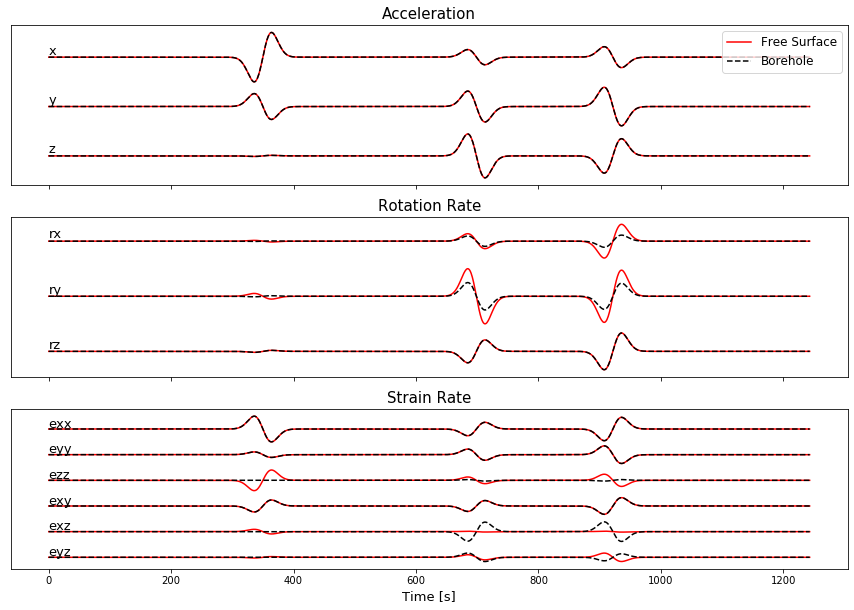

In [14]:
f = 5.
fs = 100.
N = 1
nus, gammas = get_direction('random',C,N)
for i in range(N):
    vel,v = get_eigenvals(gammas[i], density)
    seis,t = get_seis_strain_free_surface(v, vel, nus[i], f, fs, C)
    fig, ax = plt.subplots(nrows=3,figsize=(15,10),sharex=True)
    a0 = np.max([max(seis[1,:]),max(seis[0,:]),max(seis[2,:])])
    a1 = np.max([max(seis[3,:]),max(seis[4,:]),max(seis[5,:])])
    a2 = np.max([max(seis[6,:]),max(seis[7,:]),max(seis[8,:]),max(seis[9,:]),max(seis[10,:]),max(seis[11,:])])
    ax[0].plot(seis[0,:],c='r',label='Free Surface')
    ax[0].plot(seis[1,:]-2*a0,c='r')
    ax[0].plot(seis[2,:]-4*a0,c='r')
    ax[1].plot(seis[3,:],c='r')
    ax[1].plot(seis[4,:]-2*a1,c='r')
    ax[1].plot(seis[5,:]-4*a1,c='r')
    ax[2].plot(seis[6,:],c='r')
    ax[2].plot(seis[7,:]-2*a2,c='r')
    ax[2].plot(seis[8,:]-4*a2,c='r')
    ax[2].plot(seis[9,:]-6*a2,c='r')
    ax[2].plot(seis[10,:]-8*a2,c='r')
    ax[2].plot(seis[11,:]-10*a2,c='r')
    seis, t = get_seis_strain(v, vel, nus[i], f, fs)
    ax[0].plot(seis[0,:],c='k',linestyle='--',label='Borehole')
    ax[0].plot(seis[1,:]-2*a0,c='k',linestyle='--')
    ax[0].plot(seis[2,:]-4*a0,c='k',linestyle='--')
    ax[1].plot(seis[3,:],c='k',linestyle='--')
    ax[1].plot(seis[4,:]-2*a1,c='k',linestyle='--')
    ax[1].plot(seis[5,:]-4*a1,c='k',linestyle='--')
    ax[2].plot(seis[6,:],c='k',linestyle='--')
    ax[2].plot(seis[7,:]-2*a2,c='k',linestyle='--')
    ax[2].plot(seis[8,:]-4*a2,c='k',linestyle='--')
    ax[2].plot(seis[9,:]-6*a2,c='k',linestyle='--')
    ax[2].plot(seis[10,:]-8*a2,c='k',linestyle='--')
    ax[2].plot(seis[11,:]-10*a2,c='k',linestyle='--')
    ax[0].legend(loc=0,fontsize=12)
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    ax[2].set_yticks([])
    ax[0].set_title('Acceleration',fontsize=15)
    ax[1].set_title('Rotation Rate',fontsize=15)
    ax[2].set_title('Strain Rate',fontsize=15)
    ax[2].set_xlabel('Time [s]',fontsize=13)
    ax[0].text(0,0+a0/10,'x',fontsize=13)
    ax[0].text(0,-2*a0+a0/10,'y',fontsize=13)
    ax[0].text(0,-4*a0+a0/10,'z',fontsize=13)
    ax[1].text(0,0+a1/10,'rx',fontsize=13)
    ax[1].text(0,-2*a1+a1/10,'ry',fontsize=13)
    ax[1].text(0,-4*a1+a1/10,'rz',fontsize=13)
    ax[2].text(0,0+a2/10,'exx',fontsize=13)
    ax[2].text(0,-2*a2+a2/10,'eyy',fontsize=13)
    ax[2].text(0,-4*a2+a2/10,'ezz',fontsize=13)
    ax[2].text(0,-6*a2+a2/10,'exy',fontsize=13)
    ax[2].text(0,-8*a2+a2/10,'exz',fontsize=13)
    ax[2].text(0,-10*a2+a2/10,'eyz',fontsize=13)
    plt.savefig('Freesurfacebc.png')
    plt.show()